# Uporedjivanje bitkoina sa etheriumom
# Da li su iste/slicne distributivnosti vrednosti cena
# Da li su korelisani cene etheriuma sa bitkoinom?
### Pretpostavka je da JESU jer

In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import lognorm, norm
import scipy
from sklearn.linear_model import LinearRegression
import datetime as dt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp

coincapEthPath = "/FileStore/real-data/coincap_ethereum.csv"
coincapBitcoinPath = "/FileStore/real-data/coincap2.csv"

jsonSchema = StructType([
    StructField("priceUsd", StringType(), True),
    StructField("time", LongType(), True),
    StructField("date", StringType(), True)
])
ethereum_coincap_df_pd = spark.read.schema(jsonSchema).json(coincapEthPath).toPandas()
ethereum_coincap_df_pd = ethereum_coincap_df_pd.drop_duplicates()
display(ethereum_coincap_df_pd.head())

bitcoin_coincap_df_pd = spark.read.schema(jsonSchema).json(coincapBitcoinPath).toPandas()
bitcoin_coincap_df_pd = bitcoin_coincap_df_pd.drop_duplicates()
display(bitcoin_coincap_df_pd.head())

priceUsd,time,date
1558.7557907096186851,1674604800000,2023-01-25T00:00:00.000Z
1586.5378439115126418,1674777600000,2023-01-27T00:00:00.000Z
1586.8916045456866777,1674864000000,2023-01-28T00:00:00.000Z
1650.7829688100817108,1675382400000,2023-02-03T00:00:00.000Z
1538.1842500199916307,1675987200000,2023-02-10T00:00:00.000Z


priceUsd,time,date
22985.8084693994132959,1674518400000,2023-01-24T00:00:00.000Z
23088.5098671765254327,1674691200000,2023-01-26T00:00:00.000Z
23017.3320728634933905,1674777600000,2023-01-27T00:00:00.000Z
23828.2216365205844973,1675296000000,2023-02-02T00:00:00.000Z
22551.4951913173097458,1675900800000,2023-02-09T00:00:00.000Z


In [0]:
bitcoin_coincap_df_pd['priceUsd'] = bitcoin_coincap_df_pd['priceUsd'].astype(float)
ethereum_coincap_df_pd['priceUsd'] = ethereum_coincap_df_pd['priceUsd'].astype(float)

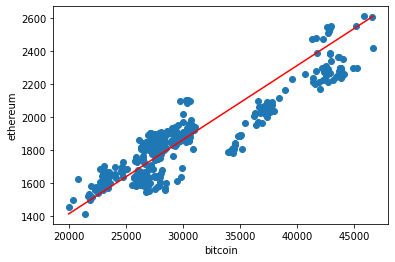

In [0]:
# sm.qqplot_2samples(bitcoin_prices, ethereum_prices, xlabel='bitcoin', ylabel='ethereum', line='r')

bitcoin_prices = bitcoin_coincap_df_pd['priceUsd'] #.sort_values()
ethereum_prices = ethereum_coincap_df_pd['priceUsd'] #.sort_values()
# ethereum_prices = ethereum_prices.sort_values()

plt.scatter(bitcoin_prices, ethereum_prices)
bitcoin_prices.min()
type(bitcoin_prices)
plt.plot([bitcoin_prices.min(), bitcoin_prices.max()],[ethereum_prices.min(), ethereum_prices.max()],color="red")
plt.xlabel("bitcoin")
plt.ylabel("ethereum")
plt.show()

Mozemo videti, pomocu plota, da dok je Bitcoin imao "manju" vrednost da je donekle ethereum pratio njegov rast,
ali kako je bitcoin-u vrednost rasla tako je ethereumu stagnirala i opadala u nekom trenutku
Moja hipoteza je da ce donekle imati korelaciju, ajde da vidimo pomocu KS testa.

In [0]:

# Perform the KS test
ks_statistic, p_value = ks_2samp(bitcoin_prices, ethereum_prices)

# Display the results
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The two datasets may come from different distributions.")
else:
    print("There is no significant evidence to suggest that the datasets come from different distributions.")

KS Statistic: 1.0
P-value: 4.791460585515606e-218
The two datasets may come from different distributions.


# p_value nam je dosta mala, tj manja od alpha = 0.05 --> Znaci Ethereum i Bitcoin nemaju istu distributivnost sto je donekle 
# ocekivano?

In [0]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(bitcoin_prices, ethereum_prices)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.916


In [0]:
bitcoin_ethereum_prices = pd.DataFrame({'bitcoin': bitcoin_prices, 'ethereum': ethereum_prices})
cormat = bitcoin_ethereum_prices.corr()
cormat

,bitcoin,ethereum
bitcoin,1.000000,0.491186
ethereum,0.491186,1.000000
